### Dependencies and Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

### File to Load

In [2]:
city_data_to_load = "data/city_data.csv"

ride_data_to_load = "data/ride_data.csv"

### Read the City and Ride Data

In [3]:
city_data = pd.read_csv(city_data_to_load, low_memory=False, encoding="UTF-8")

ride_data = pd.read_csv(ride_data_to_load, low_memory=False, encoding="UTF-8")

### Combine the data into a single dataset and display the data table for preview

In [4]:
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")

combined_data.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

### Code filters data by city type (i.e. Urban, Rural, Suburban)

In [5]:
urban_city = combined_data[combined_data["type"] == "Urban"]

rural_city = combined_data[combined_data["type"] == "Rural"]

suburban_city = combined_data[combined_data["type"] == "Suburban"]

### Code calculates the count of rides in each city by city type

In [6]:
count_rides_urban = urban_city.groupby("city")["type"].count()

count_rides_rural = rural_city.groupby("city")["type"].count()

count_rides_suburban = suburban_city.groupby("city")["type"].count()

### Code calculates the average fare for each city by city type

In [7]:
avg_fare_urban = urban_city.groupby("city").mean()["fare"]

avg_fare_rural = rural_city.groupby("city").mean()["fare"]

avg_fare_suburban = suburban_city.groupby("city").mean()["fare"]

### Code calculates the count of drivers in each city by city type

In [8]:
count_drivers_urban =  urban_city.groupby("city")["driver_count"].first()

count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()

count_drivers_suburban = suburban_city.groupby("city")["driver_count"].first()

## Bubble Plot of Ride Sharing Data
### Code creates a bubble chart of the total rides, average fare, and total drivers in each city by city type

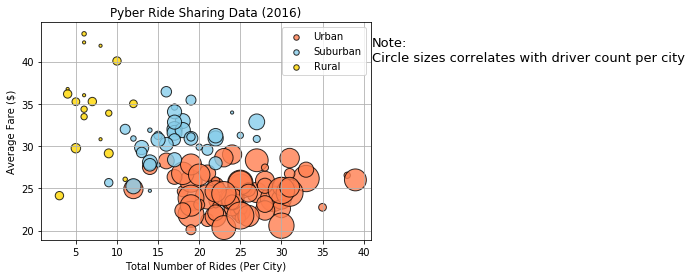

In [9]:
fig = plt.figure(figsize = (13,4))

ax = fig.add_subplot(121)

ax.scatter(count_rides_urban, avg_fare_urban, s = count_drivers_urban*10, marker = "o", label = "Urban",
           color ="coral", alpha =.8, edgecolors = "black", linewidth = 1)

ax.scatter(count_rides_suburban, avg_fare_suburban, s=count_drivers_suburban*10, label = "Suburban",
           marker = "o",color = "skyblue", alpha =.8, edgecolors ="black", linewidth = 1)

ax.scatter(count_rides_rural, avg_fare_rural, s = count_drivers_rural*10 ,marker = "o", label = "Rural", 
           color = "gold", alpha =.8, edgecolors ="black", linewidth=1)

plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel("Average Fare ($)")

plt.title("Pyber Ride Sharing Data (2016)")

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [30]

lgnd.legendHandles[1]._sizes = [30]

lgnd.legendHandles[2]._sizes = [30]

plt.grid()

plt.text(41,40,"Note:\nCircle sizes correlates with driver count per city", fontsize=13)

plt.show()

fig.savefig("Images_Results/Rides_by_AvgFare.png")

## Total Fares by City Type
### Code calculates the breakdown of total fare by city type
* Code will divide the sum of all fares by the sum the fare for each city type
* lables and colors variables are created for plotting the pie chart

In [10]:
per_type_fare = combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum()*100

label = per_type_fare.index

colors = ["gold", "skyblue","lightcoral"]

### Code plots a pie chart based on the variables calculated above.
* The pie chart is then saved to the 'Images_Results' folder

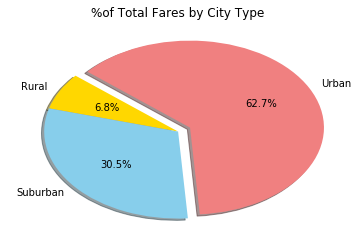

In [11]:
plt.pie(per_type_fare, colors = colors, labels = label, autopct = "%1.1f%%", shadow = True, 
        startangle = 140, explode = [0,0,0.1])

plt.title("%of Total Fares by City Type")

plt.savefig("Images_Results/Fares_by_CityType.png")

## Total Rides by City Type
### Code calculates the breakdown of total rides by city type
* Code will divide the sum of all rides taken by the sum the rides taken for each city type
* lables and colors variables are created for plotting the pie chart

In [12]:
per_type_rides = combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()*100

label = per_type_rides.index

colors = ["gold", "skyblue","lightcoral"]

### Code plots a pie chart based on the variables calculated above.
* The pie chart is then saved to the 'Images_Results' folder

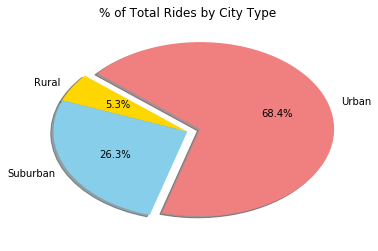

In [13]:
plt.pie(per_type_rides, colors = colors, labels = label, autopct = "%1.1f%%", shadow = True,
        startangle=140, explode=[0,0,0.1])

plt.title("% of Total Rides by City Type")

plt.savefig("Images_Results/Rides_by_CityType.png")

## Total Drivers by City Type
### Code calculates the breakdown of total drivers by city type
* Code will sum the unique count of drivers for each city by city type


In [14]:
count_drivers_urban_df = pd.DataFrame(count_drivers_urban).reset_index()

sum_urban_drivers = count_drivers_urban_df["driver_count"].sum()

count_drivers_rural_df = pd.DataFrame(count_drivers_rural).reset_index()

sum_rural_drives = count_drivers_rural_df["driver_count"].sum()

count_drivers_suburban_df = pd.DataFrame(count_drivers_suburban ).reset_index()

sum_suburban_drives = count_drivers_suburban_df["driver_count"].sum()

* Lables and colors variables are created for plotting the pie chart
* Code plots pie chart and saves figure to 'Images_Results' folder

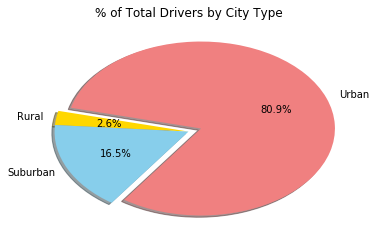

In [15]:
fig = plt.figure()

labels = ["Urban", "Rural", "Suburban"]

sizes = [sum_urban_drivers, sum_rural_drives, sum_suburban_drives]

colors = ["lightcoral", "gold", "skyblue"]

explode =[0.1,0,0]

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct ="%1.1f%%", shadow = True, startangle = 235)

plt.title('% of Total Drivers by City Type')

plt.savefig("Images_Results/Drivers_by_CityType.png")

## Conclusion